<a href="https://colab.research.google.com/github/netmatze/mlmatze/blob/main/feature_engineering_with_logerithmus_box_cox_yeo_johnson_transformation_and_scaling_standardisation_and_l1_and_l2_norm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### examples for transforming the distribution of data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
import json

In [ ]:
biz_df = pd.read_json("https://raw.githubusercontent.com/netmatze/mlmatze/main/yelp_short.json", lines=True, encoding='utf8')
biz_df.head()

# biz_df = pd.read_json(r'yelp_short.json', lines=True, encoding='utf8')
# biz_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


### showing the distribution of the yelp data

<Axes: >

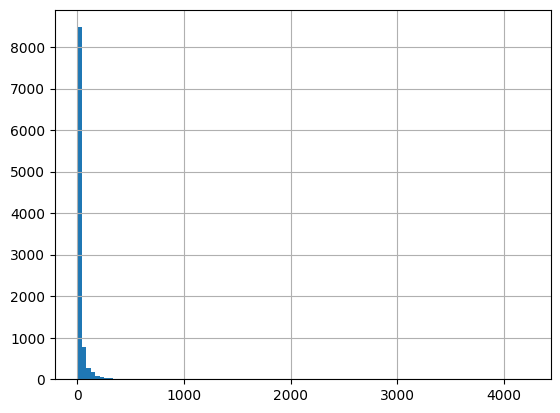

In [ ]:
biz_df['review_count'].hist(bins=100)

### using logerithmic transformation to change the distribution of the yelp data

### transform bases of logarithm

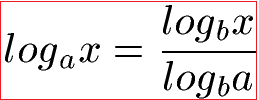

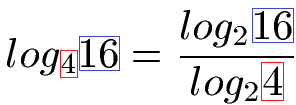

4.0
2.0


Text(0, 0.5, 'Occurence')

<Figure size 2000x2000 with 0 Axes>

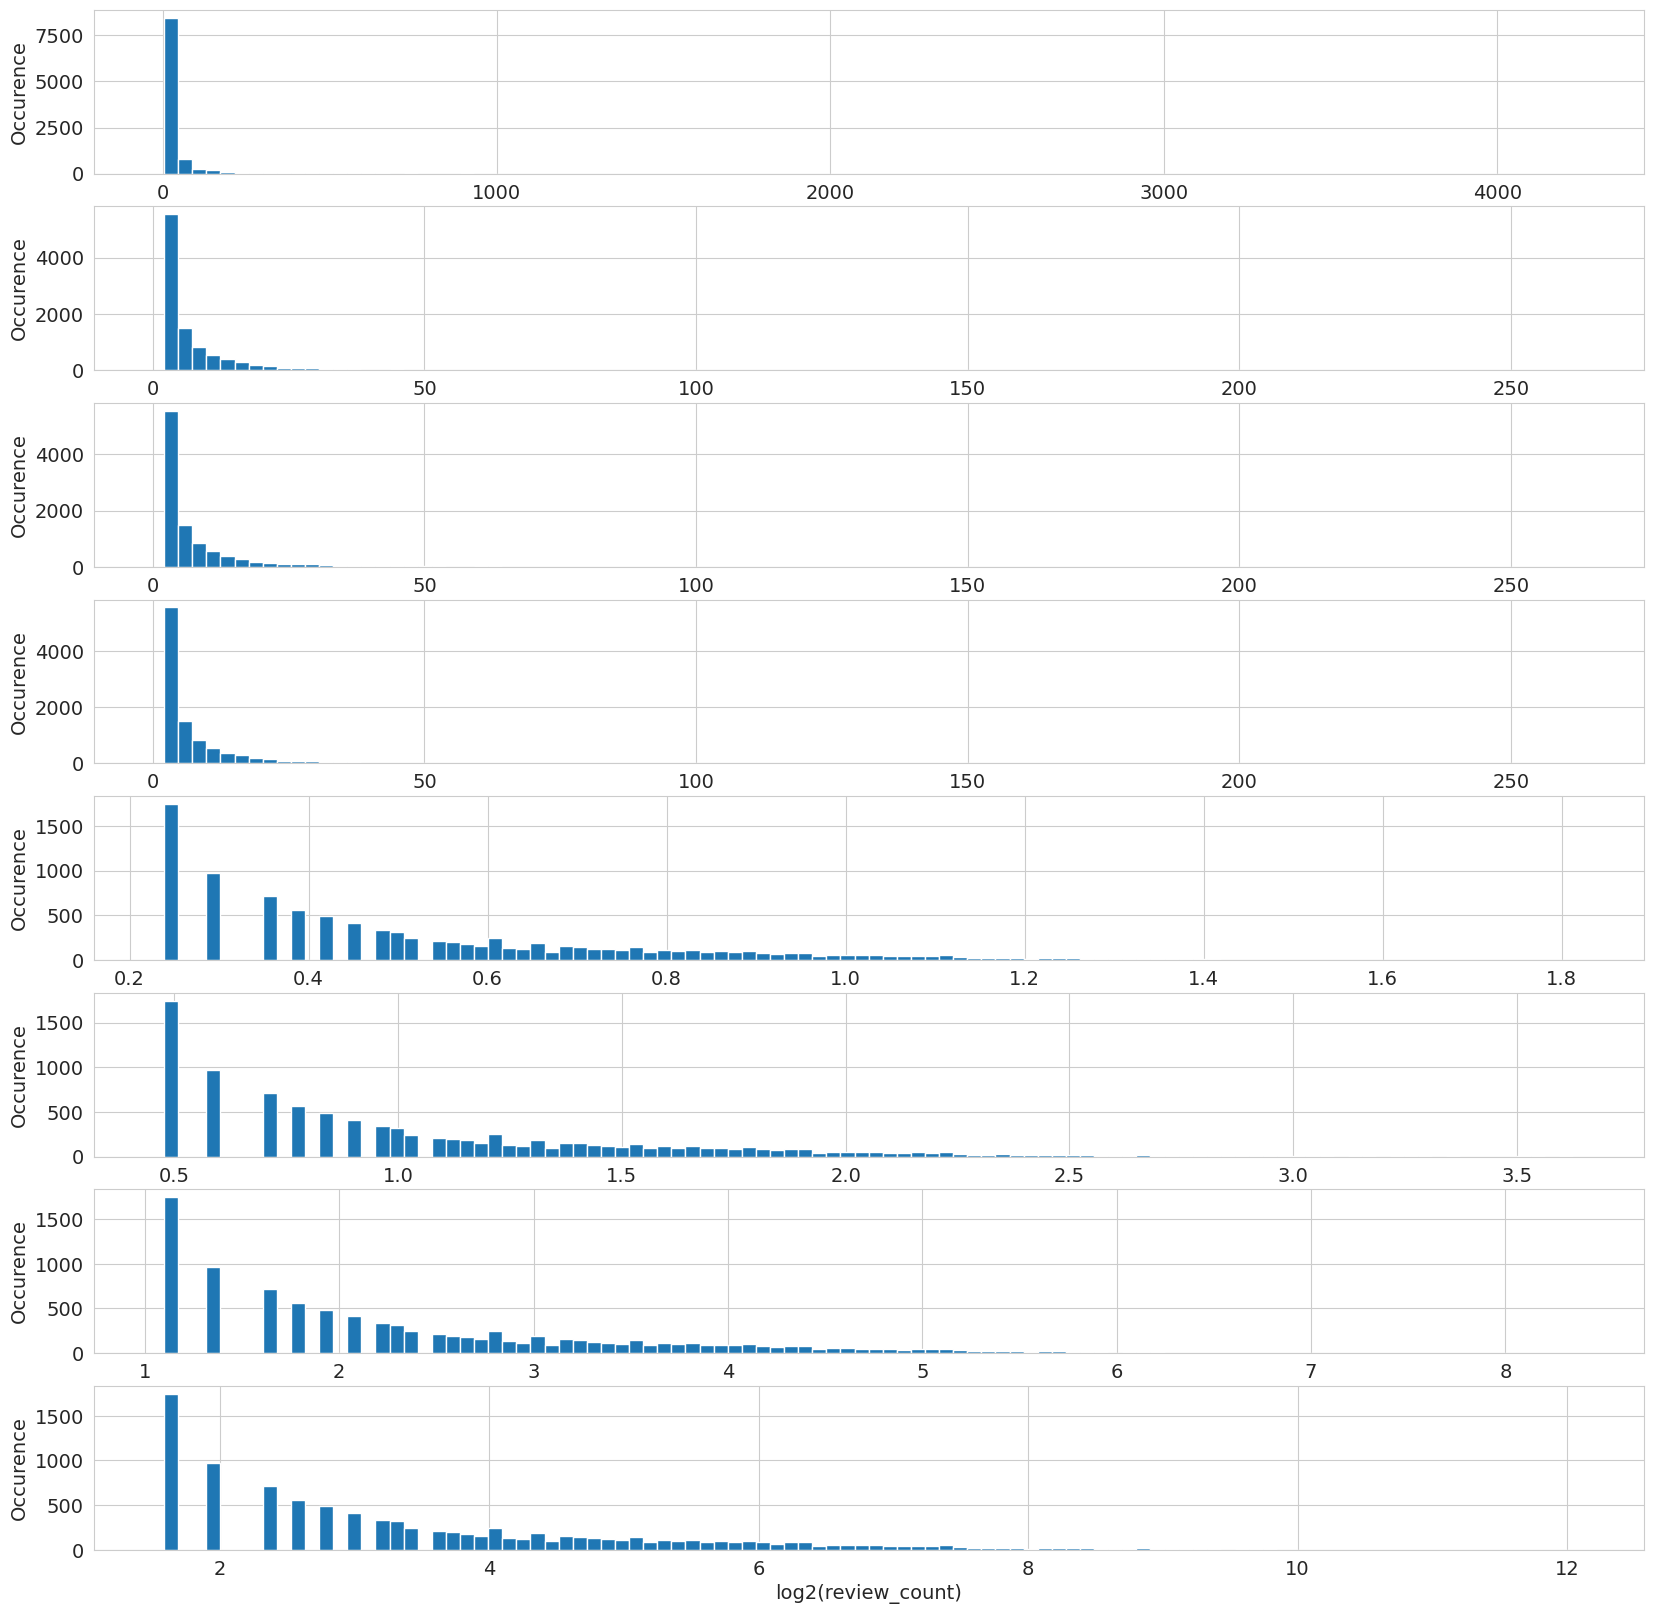

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import math

def calculate_log_for_base(x,base=2):
  log_value = np.log10(x) / np.log10(base)
  return log_value

def reciprocal_transformation(x):
  return 1 / x

def square_root_transformation(x):
  return math.sqrt(x)

def exponential_transformation(x,base=2):
  return x**(1/1.5)

log_basis = 2

#log2 (16) = log10 (16) / log10 (2)

log2 = np.log10(16) / np.log10(2)
print(calculate_log_for_base(16,2))

log4 = np.log10(16) / np.log10(4)
print(calculate_log_for_base(16,4))

biz_df['exp3_review_count'] = exponential_transformation(biz_df['review_count'],0.5)
biz_df['exp5_review_count'] = exponential_transformation(biz_df['review_count'],5)
biz_df['exp10_review_count'] = exponential_transformation(biz_df['review_count'],10)
biz_df['log10_review_count'] = np.log10(biz_df['review_count'])
biz_df['ln_review_count'] = np.log(biz_df['review_count'])
biz_df['log2_review_count'] = calculate_log_for_base(biz_df['review_count'],2)
biz_df['log100_review_count'] = calculate_log_for_base(biz_df['review_count'],100)

plt.figure(figsize=(20,20))
sns.set_style('whitegrid')
fig, (ax, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8,1, figsize=(20,20))
biz_df['review_count'].hist(ax=ax, bins=100)

ax.tick_params(labelsize=14)
ax.set_xlabel('Review count', fontsize=14)
ax.set_ylabel('Occurence', fontsize=14)

biz_df['exp3_review_count'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('exp3(review_count)', fontsize=14)
ax2.set_ylabel('Occurence', fontsize=14)

biz_df['exp5_review_count'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('exp5(review_count)', fontsize=14)
ax3.set_ylabel('Occurence', fontsize=14)

biz_df['exp10_review_count'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('exp10(review_count)', fontsize=14)
ax4.set_ylabel('Occurence', fontsize=14)

biz_df['log100_review_count'].hist(ax=ax5, bins=100)
ax5.tick_params(labelsize=14)
ax5.set_xlabel('log100(review_count)', fontsize=14)
ax5.set_ylabel('Occurence', fontsize=14)

biz_df['log10_review_count'].hist(ax=ax6, bins=100)
ax6.tick_params(labelsize=14)
ax6.set_xlabel('log10(review_count)', fontsize=14)
ax6.set_ylabel('Occurence', fontsize=14)

biz_df['ln_review_count'].hist(ax=ax7, bins=100)
ax7.tick_params(labelsize=14)
ax7.set_xlabel('ln(review_count)', fontsize=14)
ax7.set_ylabel('Occurence', fontsize=14)

biz_df['log2_review_count'].hist(ax=ax8, bins=100)
ax8.tick_params(labelsize=14)
ax8.set_xlabel('log2(review_count)', fontsize=14)
ax8.set_ylabel('Occurence', fontsize=14)

### use box cox transformation and yeo johnson transformation

### box-cox transformation

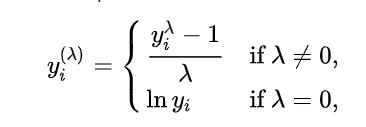

### Yeo-Johnson transformation

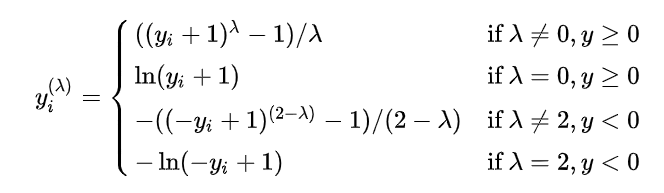

box_cox best lambda -0.3744494976700263
yeojohnson best lambda -0.4613001566833555


Text(0, 0.5, 'Occurence')

<Figure size 4000x3000 with 0 Axes>

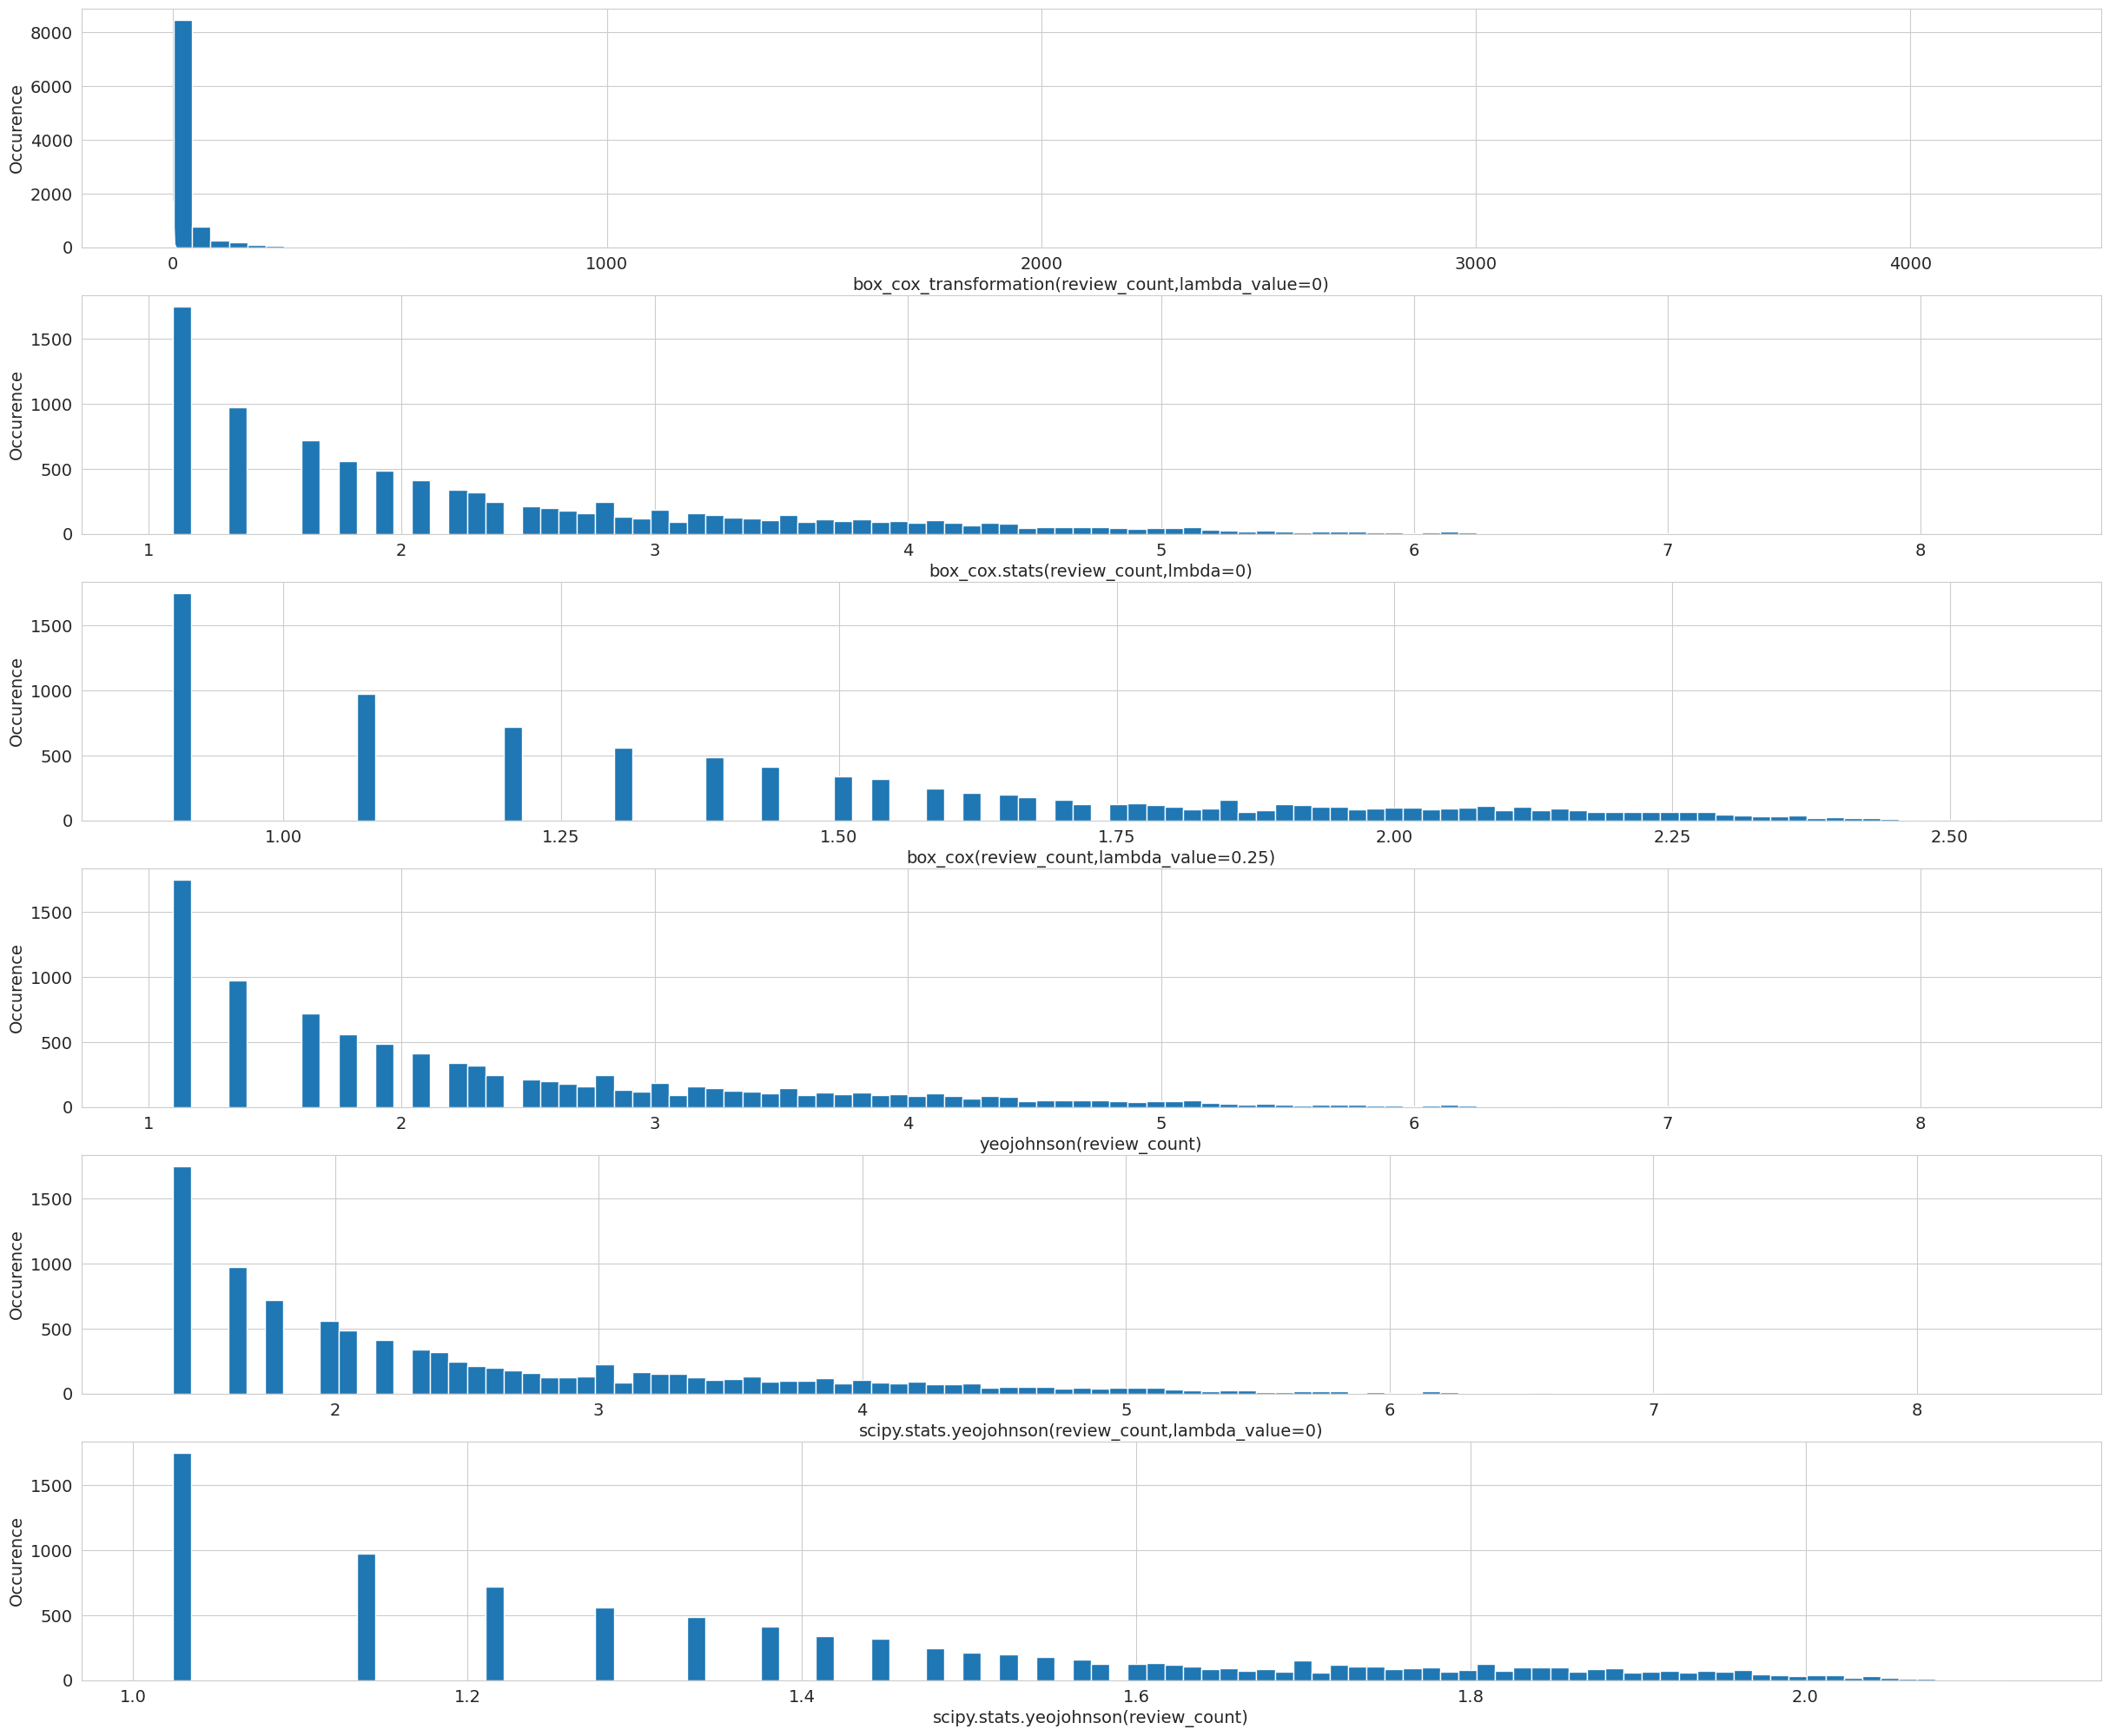

In [ ]:
def box_cox_transformation(x, lambda_value=0):
  if lambda_value == 0:
    return np.log(x + 1)
  else:
    return (x**lambda_value - 1) / lambda_value

def yeo_johnson_transformation(x, lambda_value=0):
  if lambda_value == 0:
    return np.log(x)
  elif lambda_value == 2:
    return -np.log(-x + 1)
  else:
    return ((x + 1)**lambda_value - 1) / lambda_value

biz_df['box_cox_lambda_0_review_count'] = box_cox_transformation(biz_df['review_count'],0)
biz_df['box_cox_lambda_0_stats_review_count'] = scipy.stats.boxcox(biz_df['review_count'],lmbda=0)
biz_df['box_cox_stats_best_lambda_review_count'], boxcox_best_lambda = scipy.stats.boxcox(biz_df['review_count'])
print(f'box_cox best lambda {boxcox_best_lambda}')

biz_df['yeojohnson_lambda_0_review_count'] = yeo_johnson_transformation(biz_df['review_count'],0)
biz_df['yeojohnson_lambda_0_stats_review_count'] = scipy.stats.yeojohnson(biz_df['review_count'],lmbda=0)
biz_df['yeojohnson_stats_best_lambda_review_count'], yeojohnson_best_lambda = scipy.stats.yeojohnson(biz_df['review_count'])
print(f'yeojohnson best lambda {yeojohnson_best_lambda}')

plt.figure(figsize=(40,30))
sns.set_style('whitegrid')
fig, (ax, ax1, ax2, ax3, ax4, ax5) = plt.subplots(6,1, figsize=(30,25))
biz_df['review_count'].hist(ax=ax, bins=100)

biz_df['box_cox_lambda_0_review_count'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('box_cox_transformation(review_count,lambda_value=0)', fontsize=14)
ax.set_ylabel('Occurence', fontsize=14)

biz_df['box_cox_lambda_0_stats_review_count'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('box_cox.stats(review_count,lmbda=0)', fontsize=14)
ax1.set_ylabel('Occurence', fontsize=14)

biz_df['box_cox_stats_best_lambda_review_count'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('box_cox(review_count,lambda_value=0.25)', fontsize=14)
ax2.set_ylabel('Occurence', fontsize=14)

biz_df['yeojohnson_lambda_0_review_count'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('yeojohnson(review_count)', fontsize=14)
ax3.set_ylabel('Occurence', fontsize=14)

biz_df['yeojohnson_lambda_0_stats_review_count'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('scipy.stats.yeojohnson(review_count,lambda_value=0)', fontsize=14)
ax4.set_ylabel('Occurence', fontsize=14)

biz_df['yeojohnson_stats_best_lambda_review_count'].hist(ax=ax5, bins=100)
ax5.tick_params(labelsize=14)
ax5.set_xlabel('scipy.stats.yeojohnson(review_count)', fontsize=14)
ax5.set_ylabel('Occurence', fontsize=14)

### logerithmus transformation part two for a different distribution

In [ ]:
import requests
from io import StringIO

online_df = pd.read_csv(r"https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Online%20News%20Popularity/OnlineNewsPopularity.csv")
online_df.head()

# online_df = pd.read_csv('OnlineNewsPopularity.csv')
# online_df.columns

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
online_df.columns
online_df = online_df.dropna()
online_df[" n_tokens_content"].head()
online_df[" n_tokens_content"].info()
online_df[" n_tokens_content"].isnull().sum()

<class 'pandas.core.series.Series'>
RangeIndex: 39644 entries, 0 to 39643
Series name:  n_tokens_content
Non-Null Count  Dtype  
--------------  -----  
39644 non-null  float64
dtypes: float64(1)
memory usage: 309.8 KB


0

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Occurence')

<Figure size 3000x2000 with 0 Axes>

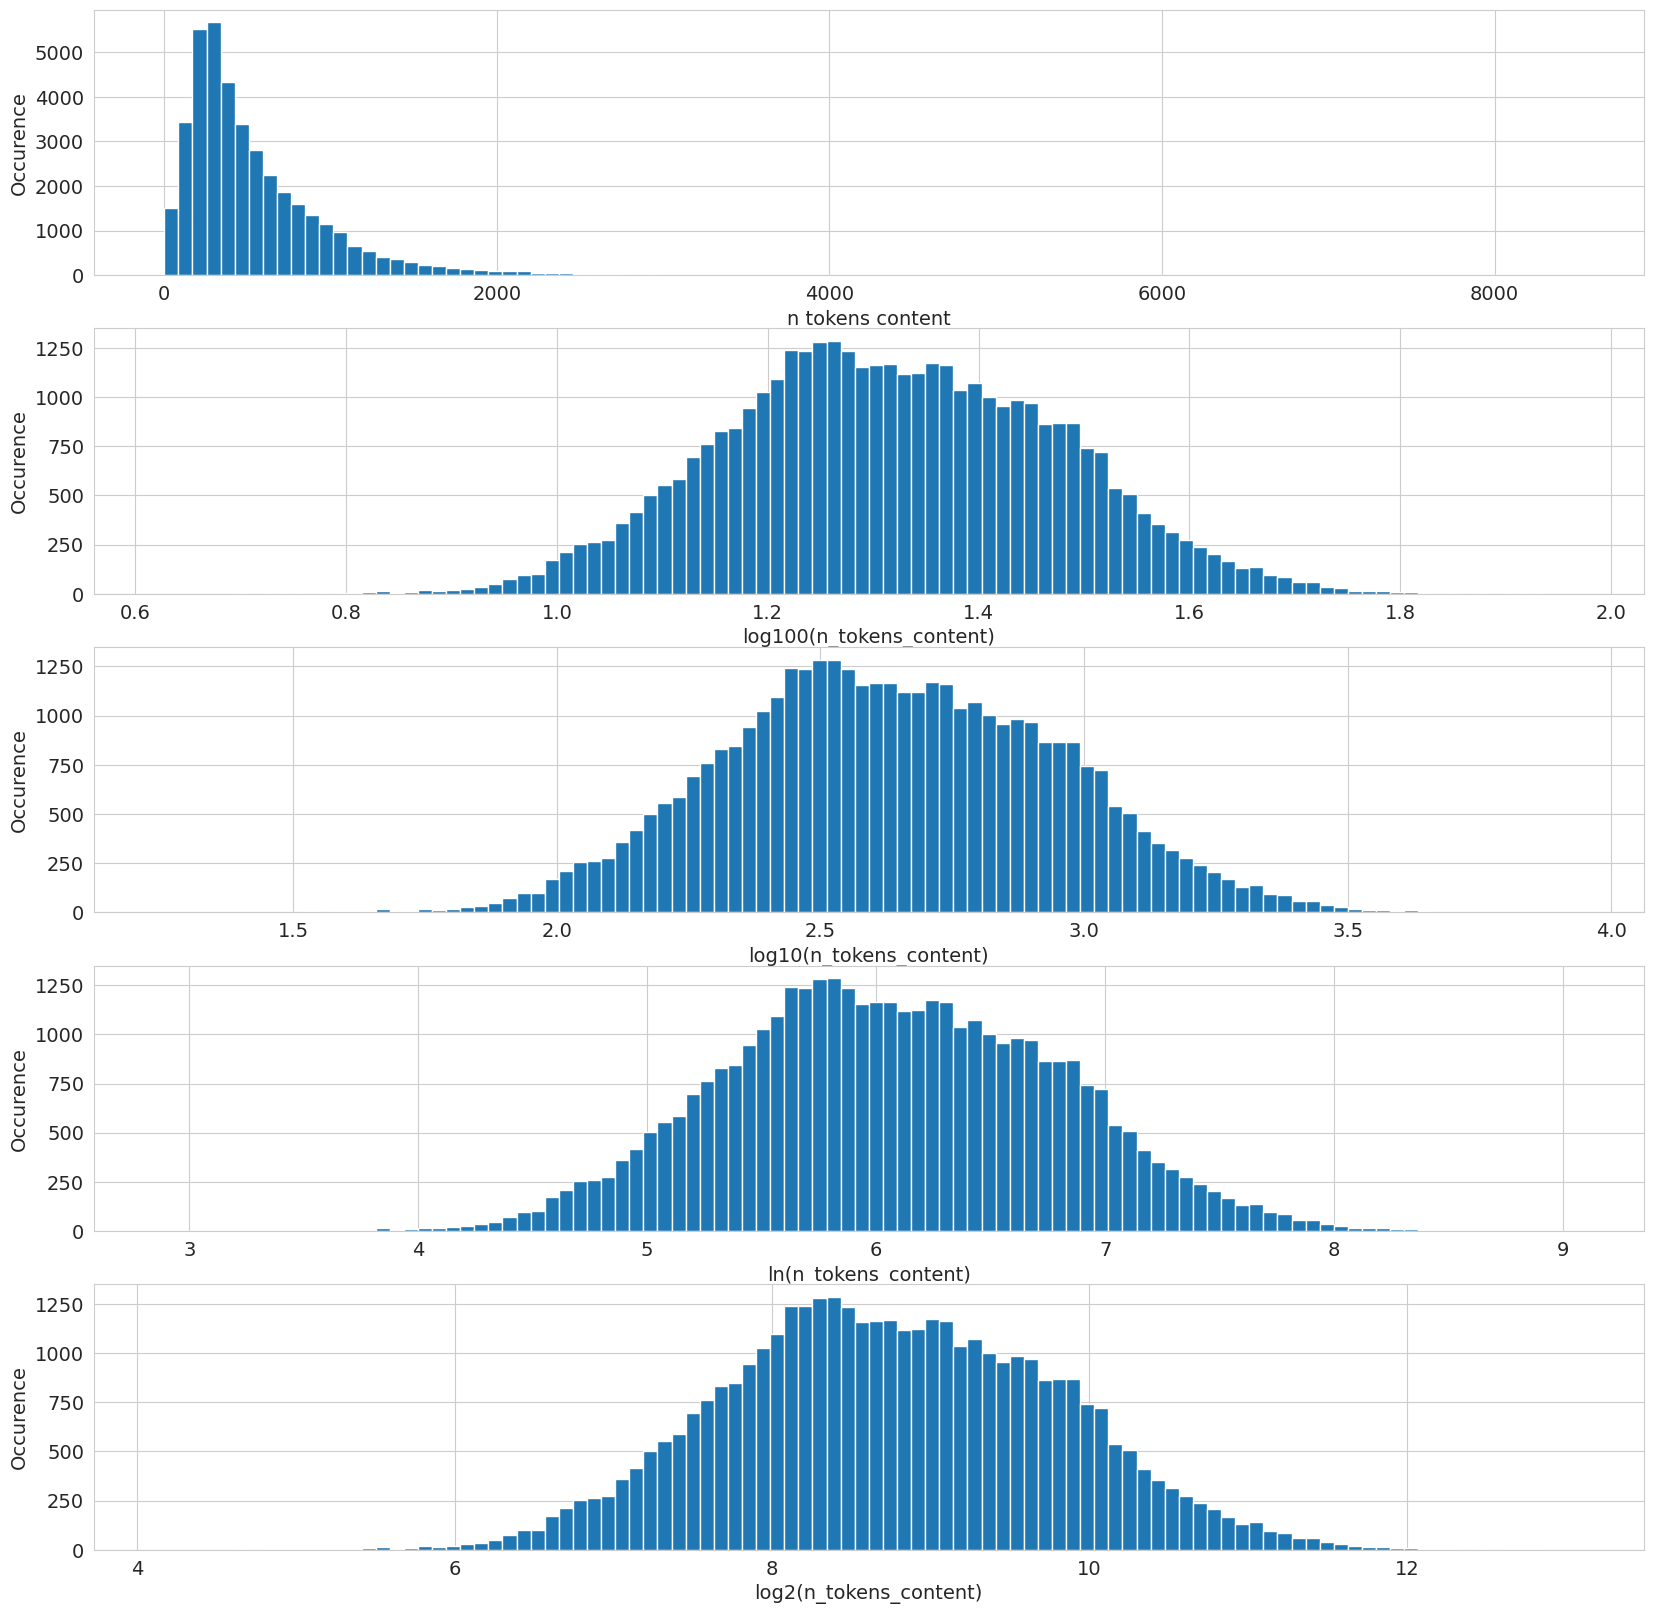

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def calculate_log_for_base(x,base=2):
  log_value = np.log10(x) / np.log10(base)
  return log_value

online_df['log10_n_tokens_content'] = np.log10(online_df[' n_tokens_content'].dropna())
online_df['ln_n_tokens_content'] = np.log(online_df[' n_tokens_content'])
online_df['log2_n_tokens_content'] = calculate_log_for_base(online_df[' n_tokens_content'],2)
online_df['log100_n_tokens_content'] = calculate_log_for_base(online_df[' n_tokens_content'],100)

plt.figure(figsize=(30,20))
sns.set_style('whitegrid')
fig, (ax, ax2, ax3, ax4, ax5) = plt.subplots(5,1, figsize=(20,20))
online_df[' n_tokens_content'].hist(ax=ax, bins=100)

ax.tick_params(labelsize=14)
ax.set_xlabel('n tokens content', fontsize=14)
ax.set_ylabel('Occurence', fontsize=14)

online_df[np.isfinite(online_df['log100_n_tokens_content'])]['log100_n_tokens_content'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('log100(n_tokens_content)', fontsize=14)
ax2.set_ylabel('Occurence', fontsize=14)

online_df[np.isfinite(online_df['log10_n_tokens_content'])]['log10_n_tokens_content'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('log10(n_tokens_content)', fontsize=14)
ax3.set_ylabel('Occurence', fontsize=14)

online_df[np.isfinite(online_df['ln_n_tokens_content'])]['ln_n_tokens_content'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('ln(n_tokens_content)', fontsize=14)
ax4.set_ylabel('Occurence', fontsize=14)

online_df[np.isfinite(online_df['log2_n_tokens_content'])]['log2_n_tokens_content'].hist(ax=ax5, bins=100)
ax5.tick_params(labelsize=14)
ax5.set_xlabel('log2(n_tokens_content)', fontsize=14)
ax5.set_ylabel('Occurence', fontsize=14)

### use raw and logerithm transformed data with linear regression

##### now we will use the untrasformed and the logerithm transformed data to fit a linear regression to check if the transformation of the data changes the quality of the linear regression prediction

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

online_df.replace([np.inf, -np.inf], 0, inplace=True)

X = online_df[[' n_tokens_content']]
y = online_df[' shares']
model = LinearRegression()
model.fit(X, y)
r2_score = model.score(X, y)
y_pred = model.predict(X)
print('---- n_tokens_content ----')
print(f'r2_score for n_tokens_content: {r2_score:.9f}')
mean_sqared_error = mean_squared_error(y, y_pred)
mean_absolute_error_value = mean_absolute_error(y, y_pred)
print(f'mean_sqared_error for n_tokens_content: {mean_sqared_error:.9f}')
print(f'mean_absolute_error for n_tokens_content: {mean_absolute_error_value}')

cross_val_score_value = cross_val_score(model, X, y, cv=10)
print(f'r sqared score with n_tokens_content {cross_val_score_value.mean()} +/- {cross_val_score_value.std() * 2}')

X = online_df[['log10_n_tokens_content']]
y = online_df[' shares']

X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

model = LinearRegression()
model.fit(X, y)

r2_score = model.score(X, y)
y_pred = model.predict(X)
print('---- log10_n_tokens_content ----')
print(f'r2_score for log10_n_tokens_content: {r2_score:.9f}')
mean_sqared_error = mean_squared_error(y, y_pred)
mean_absolute_error_value = mean_absolute_error(y, y_pred)
print(f'mean_sqared_error for log10_n_tokens_content: {mean_sqared_error:.9f}')
print(f'mean_absolute_error for log10_n_tokens_content: {mean_absolute_error_value:.9f}')

cross_val_score_value = cross_val_score(model, X, y, cv=10)
print(f'r sqared score with log10_n_tokens_content {cross_val_score_value.mean()} +/- {cross_val_score_value.std() * 2}')

X = online_df[['log100_n_tokens_content']]
y = online_df[' shares']

X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

model = LinearRegression()
model.fit(X, y)

r2_score = model.score(X, y)
y_pred = model.predict(X)
print('---- log100_n_tokens_content ----')
print(f'r2_score for log100_n_tokens_content: {r2_score:.9f}')
mean_absolute_error_value = mean_absolute_error(y, y_pred)
print(f'mean_sqared_error for log100_n_tokens_content: {mean_sqared_error:.9f}')
print(f'mean_absolute_error for log100_n_tokens_content: {mean_absolute_error_value:.9f}')

cross_val_score_value = cross_val_score(model, X, y, cv=10)
print(f'r sqared score with log100_n_tokens_content {cross_val_score_value.mean()} +/- {cross_val_score_value.std() * 2}')

---- n_tokens_content ----
r2_score for n_tokens_content: 0.000006047
mean_sqared_error for n_tokens_content: 135181756.317500204
mean_absolute_error for n_tokens_content: 3205.319500158823
r sqared score with n_tokens_content -0.0024246961830328706 +/- 0.00508553965211169
---- log10_n_tokens_content ----
r2_score for log10_n_tokens_content: 0.000448459
mean_sqared_error for log10_n_tokens_content: 135121949.932172418
mean_absolute_error for log10_n_tokens_content: 3203.367550484
r sqared score with log10_n_tokens_content -0.0011436839525584385 +/- 0.004181696538308845
---- log100_n_tokens_content ----
r2_score for log100_n_tokens_content: 0.000448459
mean_sqared_error for log100_n_tokens_content: 135121949.932172418
mean_absolute_error for log100_n_tokens_content: 3203.367550484
r sqared score with log100_n_tokens_content -0.0011436839525584385 +/- 0.004181696538308845


### min max scaling
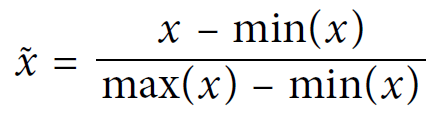

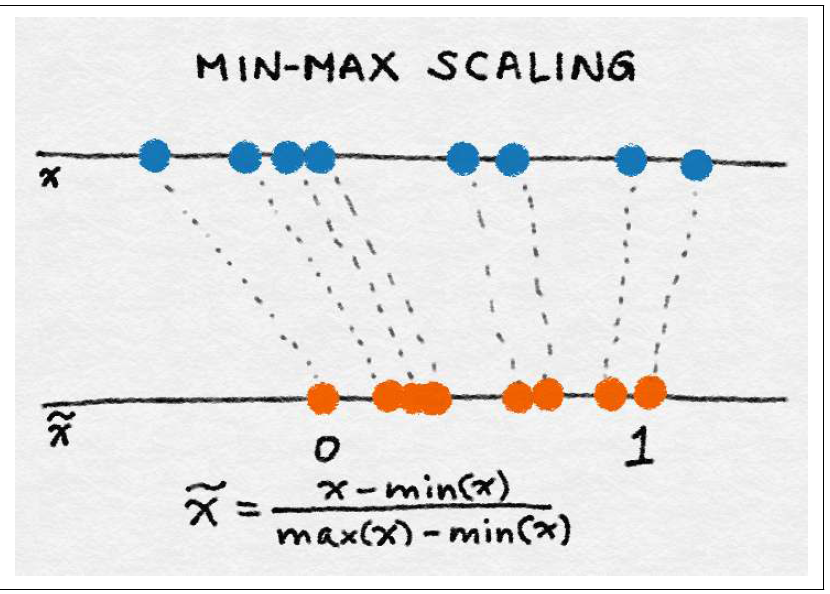

In [ ]:
import math

def min_max_scaling(x):
  return (x - min(x)) / (max(x) - min(x))

### standardisation (variance scaling)

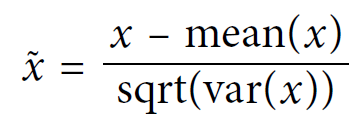

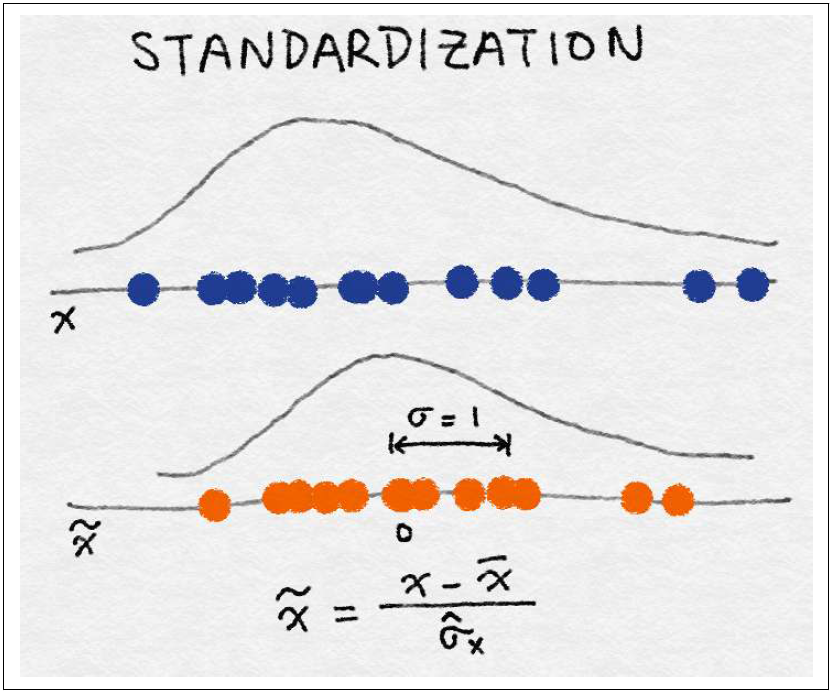

In [ ]:
import math

def standardisation(x):
  x_mean = x.mean()
  x_var = x.var()
  return (x - x_mean) / math.sqrt(x_var)

### robust scaler (min-max using inter_quantile_range)

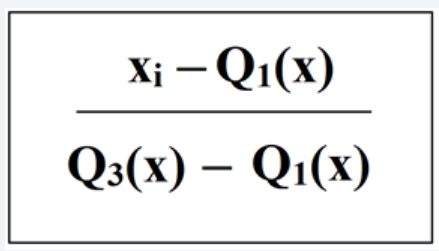

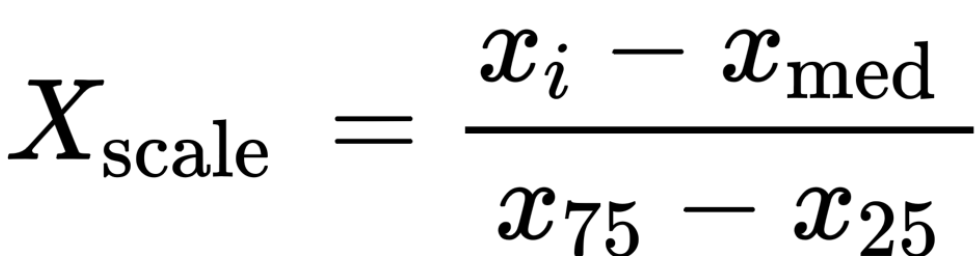

In [ ]:
import math

def robust_scaling(x):
  q1 = x.quantile(0.25)
  q3 = x.quantile(0.75)
  return (x - q1) / (q3 - q1)

def robust_scaling_median(x):
  q1 = x.quantile(0.25)
  q3 = x.quantile(0.75)
  median = x.median()
  return (x - median) / (q3 - q1)

### l1 norm

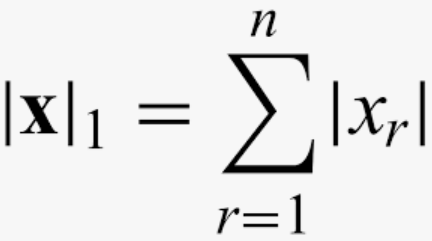

In [ ]:
def l1_norm(x):
  x_norm_abs = abs(x)
  x_norm_sum_abs = x_norm_abs.sum()
  return x / x_norm_sum_abs

### l2 norm


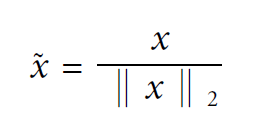

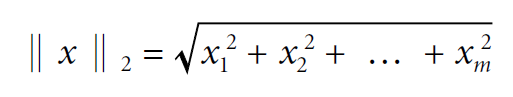

In [ ]:
def l2_norm(x):
  x_norm_squared = x ** 2
  x_norm_sum_squared = x_norm_squared.sum()
  return x / x_norm_sum_squared

### calculate the min-max scaling, standard scaling and the l2 normalization for the n_tokens_content column

In [ ]:
import pandas as pd

# online_df = pd.read_csv('OnlineNewsPopularity.csv')
online_df = pd.read_csv(r"https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Online%20News%20Popularity/OnlineNewsPopularity.csv")
online_df = online_df.dropna()
online_df[" n_tokens_content"].head()

0     219.0
1     255.0
2     211.0
3     531.0
4    1072.0
Name:  n_tokens_content, dtype: float64

In [ ]:
online_df["min_max_scaling_n_tokens_content"] = min_max_scaling(online_df[" n_tokens_content"])
online_df["robust_scaling_n_tokens_content"] = robust_scaling(online_df[" n_tokens_content"])
online_df["robust_scaling_median_n_tokens_content"] = robust_scaling_median(online_df[" n_tokens_content"])
online_df["standard_scaling_n_tokens_content"] = standardisation(online_df[" n_tokens_content"])
online_df["l1_norm_n_tokens_content"] = l1_norm(online_df[" n_tokens_content"])
online_df["l2_norm_n_tokens_content"] = l2_norm(online_df[" n_tokens_content"])
online_df[[' n_tokens_content',"min_max_scaling_n_tokens_content", "robust_scaling_n_tokens_content", "robust_scaling_median_n_tokens_content", "standard_scaling_n_tokens_content",
           "l1_norm_n_tokens_content", "l2_norm_n_tokens_content"]].head(20)

,n_tokens_content,min_max_scaling_n_tokens_content,robust_scaling_n_tokens_content,robust_scaling_median_n_tokens_content,standard_scaling_n_tokens_content,l1_norm_n_tokens_content,l2_norm_n_tokens_content
0,219.0,0.025844,-0.057447,-0.404255,-0.695202,0.000010,1.061084e-08
1,255.0,0.030092,0.019149,-0.327660,-0.618786,0.000012,1.235509e-08
2,211.0,0.024900,-0.074468,-0.421277,-0.712183,0.000010,1.022323e-08
3,531.0,0.062662,0.606383,0.259574,-0.032932,0.000025,2.572766e-08
4,1072.0,0.126505,1.757447,1.410638,1.115425,0.000049,5.193984e-08
5,370.0,0.043663,0.263830,-0.082979,-0.374680,0.000017,1.792700e-08
6,960.0,0.113288,1.519149,1.172340,0.877688,0.000044,4.651329e-08
7,989.0,0.116710,1.580851,1.234043,0.939245,0.000046,4.791838e-08
8,97.0,0.011447,-0.317021,-0.663830,-0.954166,0.000004,4.699780e-09
9,231.0,0.027260,-0.031915,-0.378723,-0.669730,0.000011,1.119226e-08


Text(0, 0.5, 'Number of articles')

<Figure size 3000x2000 with 0 Axes>

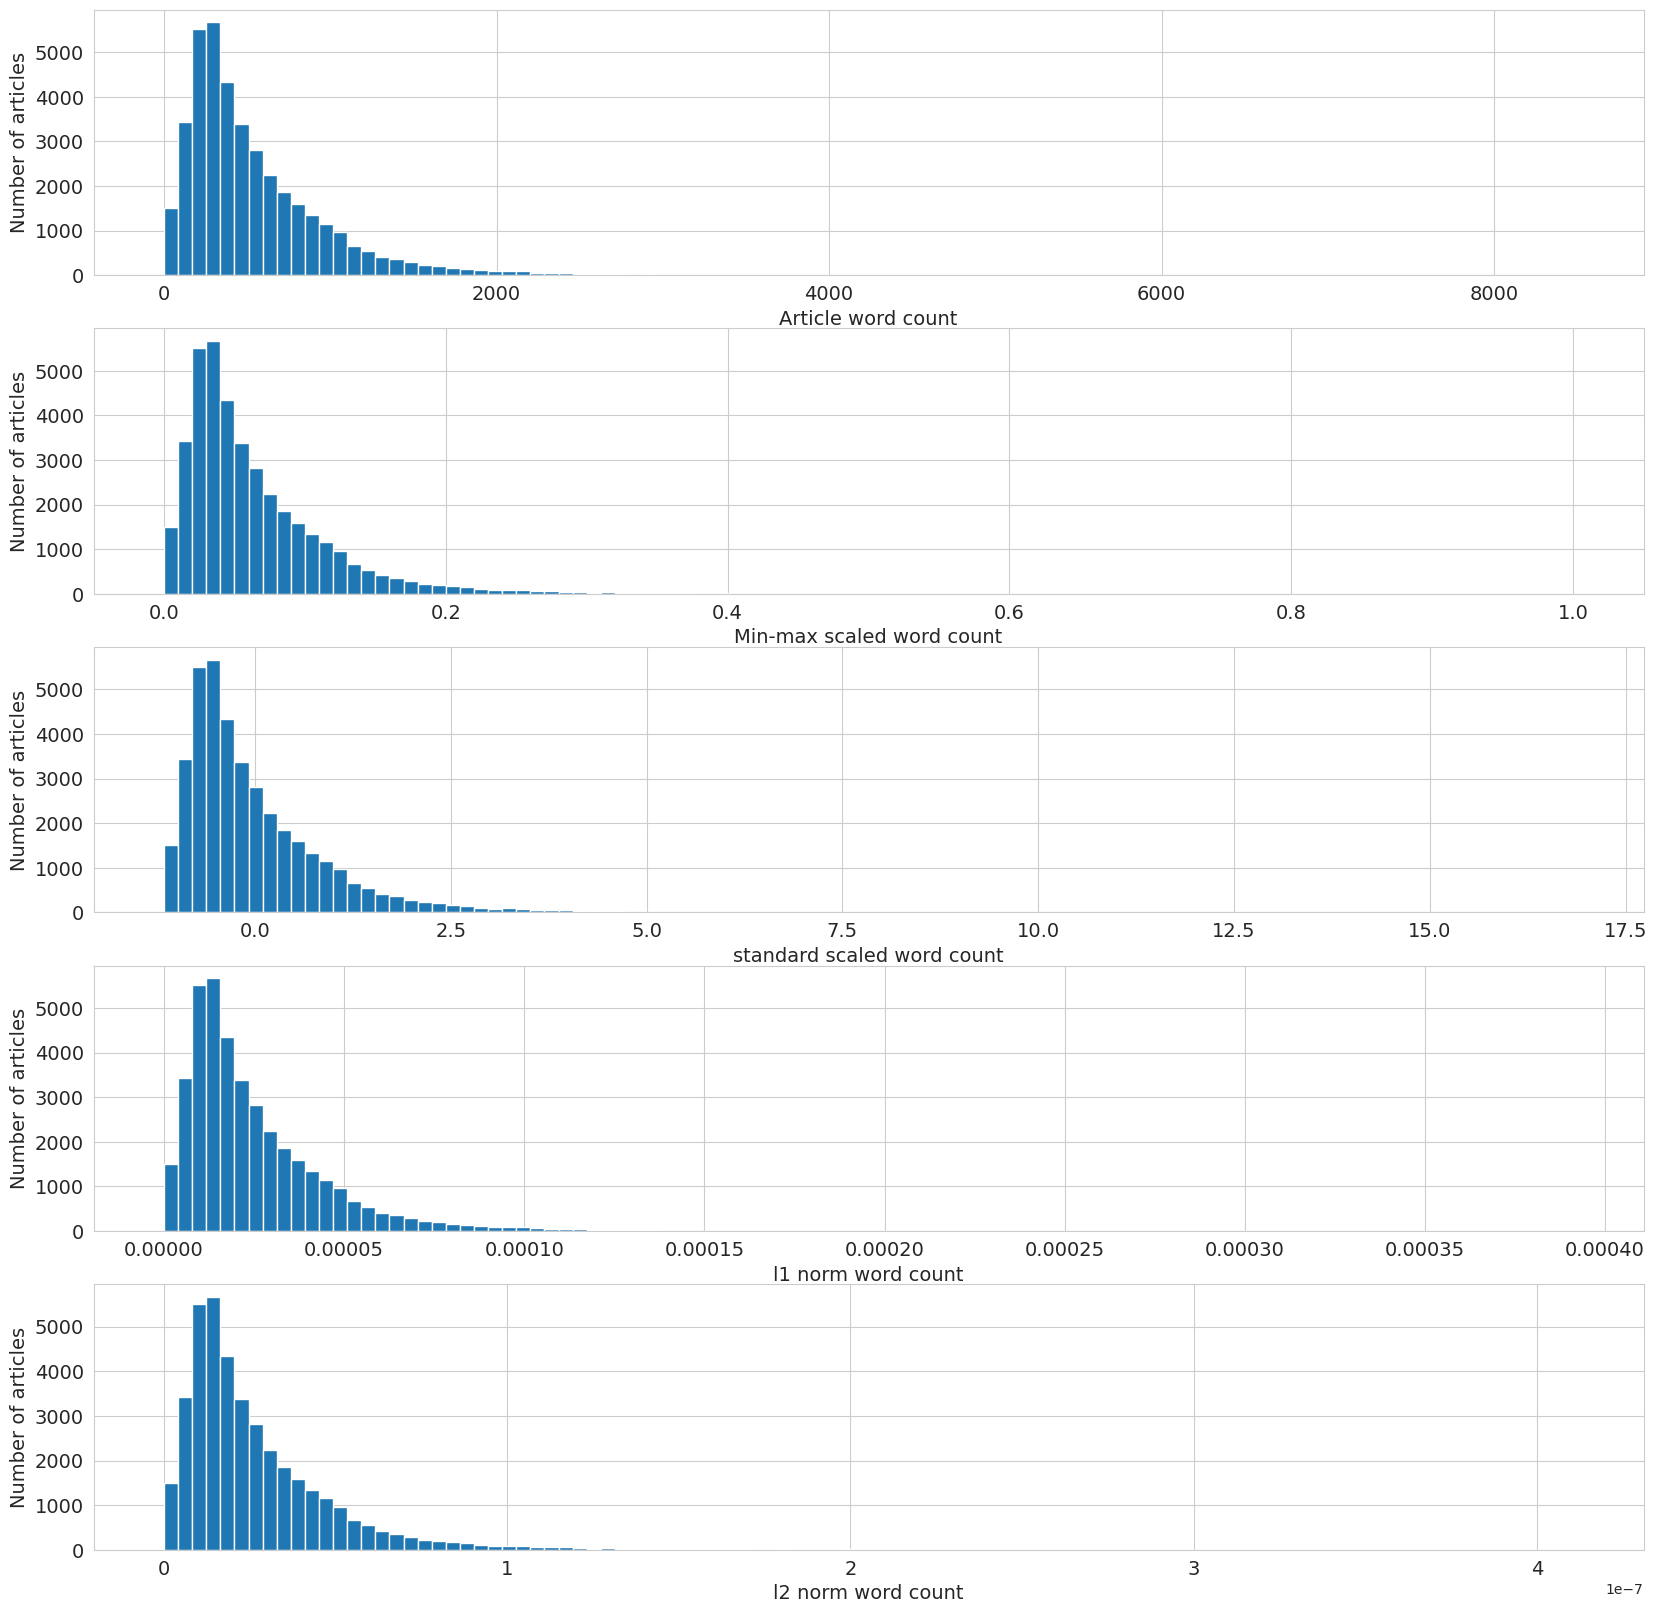

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(30,20))
sns.set_style('whitegrid')
fig, (ax, ax2, ax3, ax4, ax5) = plt.subplots(5,1, figsize=(20,20))

online_df[' n_tokens_content'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('Article word count', fontsize=14)
ax.set_ylabel('Number of articles', fontsize=14)

online_df['min_max_scaling_n_tokens_content'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
ax2.set_ylabel('Number of articles', fontsize=14)

online_df['standard_scaling_n_tokens_content'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('standard scaled word count', fontsize=14)
ax3.set_ylabel('Number of articles', fontsize=14)

online_df['l1_norm_n_tokens_content'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('l1 norm word count', fontsize=14)
ax4.set_ylabel('Number of articles', fontsize=14)

online_df['l2_norm_n_tokens_content'].hist(ax=ax5, bins=100)
ax5.tick_params(labelsize=14)
ax5.set_xlabel('l2 norm word count', fontsize=14)
ax5.set_ylabel('Number of articles', fontsize=14)

### load census data

In [ ]:
import pandas as pd

census_train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
census_test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
# census_train_path = tf.contrib.keras.utils.get_file('census.train', census_train_url)
# census_test_path = tf.contrib.keras.utils.get_file('census.test', census_test_url)

column_names = [
  'age', 'workclass', 'fnlwgt', 'education', 'education-num',
  'marital-status', 'occupation', 'relationship', 'race', 'gender',
  'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
  'income'
]

df_census_train = pd.read_csv(census_train_url, index_col=False, names=column_names)
df_census_test = pd.read_csv(census_test_url, skiprows=1, index_col=False, names=column_names)
df_census_train.head()
df_census_test.head()

### implement bucketing

In [ ]:
def create_label_encoded_bucketized_columns(df, x, bucketing_column, bucketing_boundaries=[21,41,61]):
    df[bucketing_column] = 0
    for i, item in enumerate(bucketing_boundaries):
      for j, row in enumerate(df.values):
        previous_item = 0
        value = df[x][j]
        if i > 0:
          previous_item = bucketing_boundaries[i - 1]
        if value > previous_item and value < item:
          # print(f'{value} > {previous_item} and {value} < {item} = {i}')
          df[bucketing_column][j] = i
    return df


def create_one_hot_encoded_bucketized_columns(df, x, bucketing_column, bucketing_boundaries=[21,41,61]):
    for i, item in enumerate(bucketing_boundaries):
      df[f'{bucketing_column}_{item}'] = False
      for j, row in enumerate(df.values):
        previous_item = 0
        value = df[x][j]
        if i > 0:
          previous_item = bucketing_boundaries[i - 1]
        if value > previous_item and value < item:
          # print(f'{value} > {previous_item} and {value} < {item} = {i}')
          df[f'{bucketing_column}_{item}'][j] = True
    return df

df_census_train = create_label_encoded_bucketized_columns(df_census_train, 'age', 'age_bucket')
df_census_train = create_one_hot_encoded_bucketized_columns(df_census_train, 'age', 'age_bucket')
df_census_train[['age','age_bucket']].head(100) #[['age','age_bucket']]

### implementing a feature cross

In [ ]:
class HashTable:
    def __init__(self, size):
        self.size = size
        self.table = [[] for _ in range(self.size)]

    def hash_function(self, key):
        return hash(key) % self.size

    def set(self, key, value):
        index = self.hash_function(key)
        self.table[index].append((key, value))

    def get(self, key):
        index = self.hash_function(key)
        for k, v in self.table[index]:
            if k == key:
                return v
        return None

In [ ]:
import hashlib
hash_object = hashlib.sha1(b'HelWorld')

def create_feature_cross(df, x1, x2):
    for i, item in enumerate(df):
        if(item[x1] > 0 and item[x2] > 0):
          df['X1Plus_X2Plus'] = True
        elif (item[x1] > 0 and item[x2] < 0):
          df['X1Plus_X2Plus'] = True
        elif (item[x1] < 0 and item[x2] < 0):
          df['X1Minus_X2Minus'] = True
        elif (item[x1] > 0 and item[x2] < 0):
          df['X1Minus_X2Plus'] = True
    return df

def create_multibly_feature_cross(df, x1, x2, x3):
    df[x3] = df[x1] * df[x2]
    return df

def create_divide_feature_cross(df, x1, x2, x3):
    df[x3] = df[x1] / df[x2]
    return df

def create_additional_feature_cross(df, x1, x2, x3):
    df[x3] = df[x1] + df[x2]
    return df

def create_average_feature_cross(df, x1, x2, x3):
    df[x3] = (
    df.groupby(x1)  # for each age
    [x2]                 # select the education_num
    .transform("mean")         # and compute its mean
    )
    return df

def create_frequency_feature_cross(df, x1, x2):
    df[x2] = (
    df.groupby(x1)[x1] # for each education_num
    .transform("count") / df[x1].count()) # count the education_num and divide it trough the number of rows
    return df

def create_two_feature_cross(df, x1, x2, x3, x4):
    df[x3] = ''
    df[x4] = ''
    for i, row in enumerate(df.values):
      # d = {x1 : df[x1][i], x2 : df[x2][i]}
      str_value = str(df[x1][i]) + str(df[x2][i])
      # hash_value = hash(str_value)
      hash_value = hash(str_value) % 10
      # sha1_hash_object = hashlib.md5(str_value.encode())
      # print(i, str_value, hash_value)
      # df[x3][i] = sha1_hash_object.hexdigest()
      df[x3][i] = hash_value
      df[x4][i] = str_value
    return df

df_census_train = create_two_feature_cross(df_census_train, 'age', 'education-num', 'age_education_hash', 'age_education')
df_census_train = create_multibly_feature_cross(df_census_train, 'age', 'education-num', 'age_education_mul')
df_census_train = create_divide_feature_cross(df_census_train, 'education-num', 'age', 'age_education_div')
df_census_train = create_additional_feature_cross(df_census_train, 'age', 'education-num', 'age_education_add')
df_census_train = create_average_feature_cross(df_census_train, "age", "education-num", "education_average")
df_census_train = create_frequency_feature_cross(df_census_train, "education-num", "education_frequency")
df_census_train.head(100)

# four binary features
AC -> X1Plus_X2Plus = x1 > 0 && x2 > 0

BC -> X1Plus_X2Minus = x1 > 0 && x2 < 0

AD -> X1Minus_X2Minus = x1 < 0 && x2 < 0

BD -> X1Minus_X2Plus = x1 < 0 && x2 > 0

In [ ]:
# four binary features
# AC -> X1Plus_X2Plus = x1 > 0 && x2 > 0
# BC -> X1Plus_X2Minus = x1 > 0 && x2 < 0
# AD -> X1Minus_X2Minus = x1 < 0 && x2 < 0
# BD -> X1Minus_X2Plus = x1 < 0 && x2 > 0

### titanic dataset

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

### load titanic dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', usecols=['Sex'])

### find missing values in dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)
df.isnull().sum()

             Total   Percent
Cabin          687  0.771044
Age            177  0.198653
Embarked         2  0.002245
PassengerId      0  0.000000
Survived         0  0.000000
Pclass           0  0.000000
Name             0  0.000000
Sex              0  0.000000
SibSp            0  0.000000
Parch            0  0.000000
Ticket           0  0.000000
Fare             0  0.000000


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### mean imputation

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### median imputation

In [ ]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### mode imputation

In [ ]:
df['Age'].fillna(df['Age'].mode(),inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### knn imputation

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
X = np.array(df['Age']).reshape(-1,1)
df['Age'] = imputer.fit_transform(X)
df['Age'].head(20)

### end of distribution imputation

<Axes: >

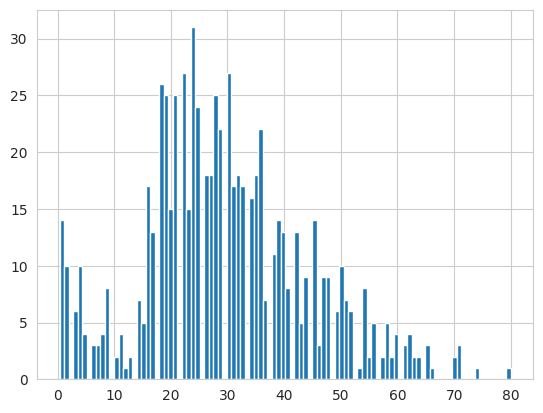

In [ ]:
df['Age'].hist(bins=100)

In [ ]:
end_of_distribution = df['Age'].mean() + 3 * df['Age'].std()
print(end_of_distribution)
df['Age'].fillna(end_of_distribution,inplace=True)
df.isnull().sum()
df[df['Age'] > 72].head(20)

### one hot encoding

In [ ]:
pd.get_dummies(df).head()
pd.concat([df, pd.get_dummies(df)], axis=1).head()

,Survived,Embarked,Survived,Embarked_C,Embarked_Q,Embarked_S
0,0,S,0,0,0,1
1,1,C,1,1,0,0
2,1,S,1,0,0,1
3,1,S,1,0,0,1
4,0,S,0,0,0,1


### label encoding

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', usecols=['Embarked'])
print(df['Embarked'].unique()) #.head()

labelEncoder = LabelEncoder()
df['Embarked_label'] = labelEncoder.fit_transform(df['Embarked'])
df.head()

['S' 'C' 'Q' nan]


,Embarked,Embarked_label
0,S,2
1,C,0
2,S,2
3,S,2
4,S,2


### frequency encoding

In [ ]:
import pandas as pd

def frequency_encoding(df, x, column_name):
  df[column_name] = (
    df.groupby(x)[x] # for each education_num
    .transform("count")
  )

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', usecols=['Embarked'])
print(df['Embarked'].unique())

frequency_encoding(df, "Embarked", "Embarked_frequency")
print(df.head())

['S' 'C' 'Q' nan]
  Embarked  Embarked_frequency
0        S               644.0
1        C               168.0
2        S               644.0
3        S               644.0
4        S               644.0


### ordinal encoding

In [ ]:
maplist = [{'col': 'Embarked', 'mapping': {'S': 1, 'C': 2,'Q': 3, 'nan': 4}}]
ordinal_encoder = ce.OrdinalEncoder(mapping=maplist)
X = ordinal_encoder.fit_transform(df['Embarked'])
X.head()

,Embarked
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0


### hashing encoding

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', usecols=['Cabin'])
df.head(20)
print(len(df.Cabin.unique()))

hashing_encoder = ce.HashingEncoder(cols = ['Cabin'], n_components=8)
X = hashing_encoder.fit_transform(df['Cabin'])
X.head(5)

148


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
pd.options.display.float_format = '{:.2f}'.format

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', usecols=['Embarked', 'Survived'])
X = df.drop('Survived', axis = 1)
y = df.drop('Embarked', axis = 1)
df['Embarked'].unique() #.head()
print(df.head())

# binary_encoder = ce.BinaryEncoder(cols = ['Embarked'])
# binary_encoder.fit_transform(X, y)

maplist = [{'col': 'Embarked', 'mapping': {'S': 1, 'C': 2,'Q': 3, 'nan': 4}}]
ordinal_encoder = ce.OrdinalEncoder(mapping=maplist)
X = ordinal_encoder.fit_transform(X, y['Survived'])
X.head(10),

# ordinal_encoder = ce.OrdinalEncoder(cols = ['Embarked'])
# X = ordinal_encoder.fit_transform(X, y['Survived'])
# X.head(10)

hashing_encoder = ce.HashingEncoder(cols = ['Embarked'], n_components=3)
X = hashing_encoder.fit_transform(X, y)
X.head(10)

   Survived Embarked
0         0        S
1         1        C
2         1        S
3         1        S
4         0        S


,col_0,col_1,col_2
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,1,0,0


In [ ]:
train_df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', usecols=['Sex'])
train_df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [ ]:
pd.get_dummies(train_df).head()
pd.concat([train_df, pd.get_dummies(train_df)], axis=1).head()

,Sex,Sex_female,Sex_male
0,male,0,1
1,female,1,0
2,female,1,0
3,female,1,0
4,male,0,1


In [ ]:
train_df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', usecols=['Embarked'])
train_df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [ ]:
pd.get_dummies(train_df).head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
train_df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
train_df.head()
train_df_OneHotEncoder = pd.concat([train_df[['Pclass', 'Age', 'SibSp','Parch', 'Survived']], # Choosen the numerical variables
                      pd.get_dummies(train_df.Sex, drop_first=True),   # Sex as explained above which is binary categorical variable
                      pd.get_dummies(train_df.Embarked, drop_first=True)],  # Embarked as explained above has k categories in categorical
                    axis=1)

train_df_OneHotEncoder.head(10)

,Pclass,Age,SibSp,Parch,Survived,male,Q,S
0,3,22.00,1,0,0,1,0,1
1,1,38.00,1,0,1,0,0,0
2,3,26.00,0,0,1,0,0,1
3,1,35.00,1,0,1,0,0,1
4,3,35.00,0,0,0,1,0,1
5,3,NaN,0,0,0,1,1,0
6,1,54.00,0,0,0,1,0,1
7,3,2.00,3,1,0,1,0,1
8,3,27.00,0,2,1,0,0,1
9,2,14.00,1,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df_OneHotEncoder[['Pclass', 'Age', 'SibSp',
                                                              'Parch', 'male', 'Q', 'S']].fillna(0),
                                                    train_df_OneHotEncoder.Survived,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 7), (268, 7))

In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=3)
rf.fit(X_train, y_train)
print('Train set')
pred = rf.predict_proba(X_train)
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set')
pred = rf.predict_proba(X_test)
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train set
Random Forests roc-auc: 0.8696177957094207
Test set
Random Forests roc-auc: 0.8606250000000001


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', usecols=['Embarked', 'Survived'])
data.head()

for col in data.columns[1:]:
    print(col, ': ', len(data[col].unique()), ' labels')

X_train, X_test, y_train, y_test = train_test_split(data[['Embarked']], data.Survived,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

X_frequency_map = X_train.Embarked.value_counts().to_dict()
X_train.Embarked = X_train.Embarked.map(X_frequency_map)

X_train.head(10)

Embarked :  4  labels


,Embarked
857,457.00
52,108.00
386,457.00
124,457.00
578,108.00
549,457.00
118,108.00
12,457.00
157,457.00
127,457.00


### use k-means clustering to create an additional feature

In [ ]:
df = pd.read_json("https://raw.githubusercontent.com/netmatze/mlmatze/main/yelp_short.json", lines=True, encoding='utf8')
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)

X = df[['latitude','longitude']]
X["cluster"] = kmeans.fit_predict(X)
X["cluster"] = X["cluster"].astype("category")
df_train = df.join(X["cluster"])

df_train.head()
# plt.figure(figsize=(20,15))
# plt.scatter(x=df['longitude'], y=df['latitude'])
# plt.show()

<ipython-input-12-18f16fdc6d87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster"] = kmeans.fit_predict(X)
<ipython-input-12-18f16fdc6d87>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster"] = X["cluster"].astype("category")


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,cluster
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None,4
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",2
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",0
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",4
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",0


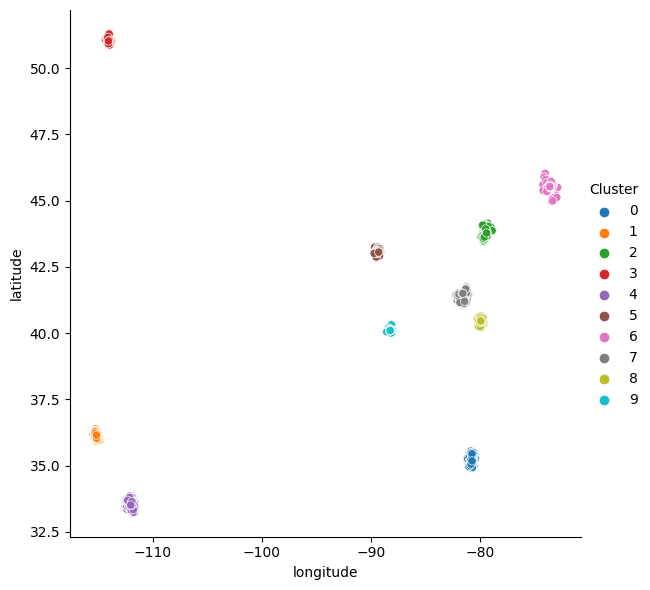

In [ ]:
sns.relplot(
    x="longitude", y="latitude", hue="cluster", data=X, height=6,
);

### simple outlier detection (for column n_tokens_content)

In [ ]:
import seaborn as sns

In [ ]:
online_df = pd.read_csv(r"https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Online%20News%20Popularity/OnlineNewsPopularity.csv")
online_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


### use boxplot to detect outliers

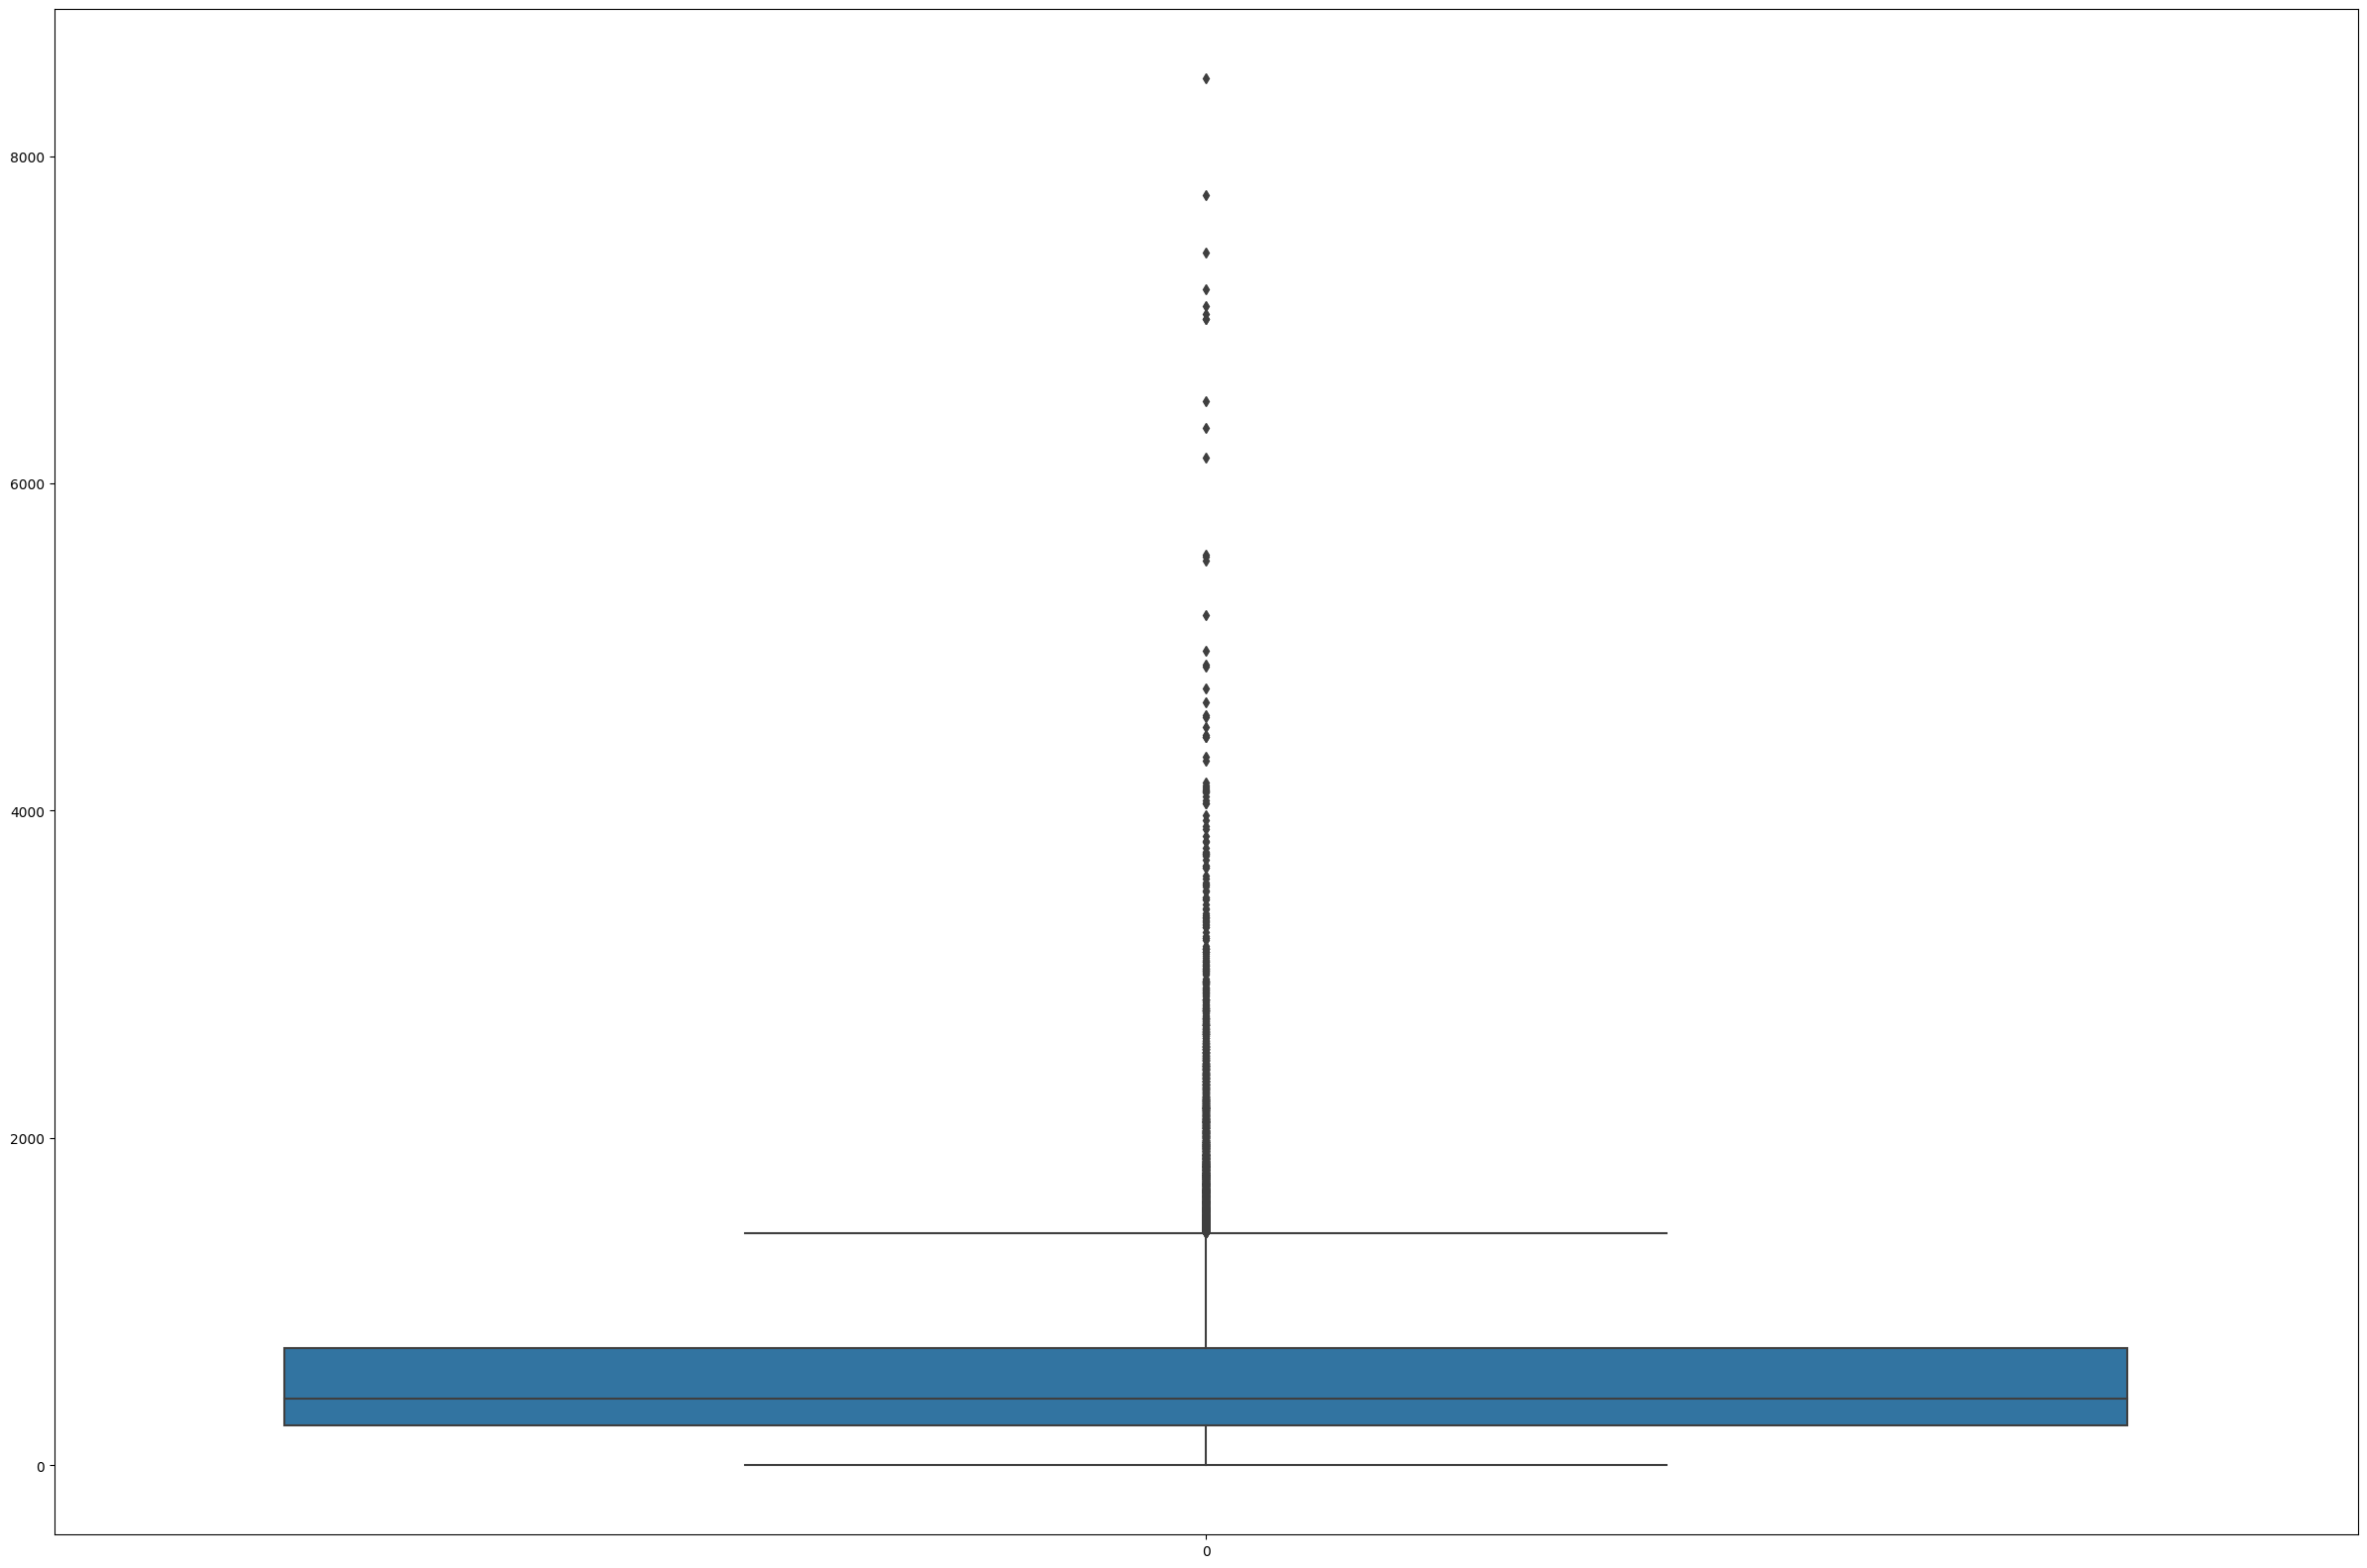

In [ ]:
plt.figure(figsize=(30,20))
sns.boxplot(online_df[' n_tokens_content'])
plt.show()

### get the q1 and q3 and calculate the interquantile range

In [ ]:
q1 = online_df[' n_tokens_content'].quantile(0.25)
q3 = online_df[' n_tokens_content'].quantile(0.75)
print(f'quantile 1: {q1}, quantile 3: {q3}')
inter_quantile_range = q3 - q1
print(f'inter quantile range: {inter_quantile_range}')
lower_limit = q1 - inter_quantile_range * 1.5
higher_limit = q3 + inter_quantile_range * 1.5
print(f'lower outlier limit: {lower_limit}, upper outlier limit: {higher_limit}')

quantile 1: 246.0, quantile 3: 716.0
inter quantile range: 470.0
lower outlier limit: -459.0, upper outlier limit: 1421.0


### remove all rows from the dataset that are beyond the lower limit (q1 - inter_quantile_range * 1.5) and above the upper limit (q3 + inter_quantile_range * 1.5)

In [ ]:
online_df_without_outliers = online_df[((online_df[' n_tokens_content'] > lower_limit) & (online_df[' n_tokens_content'] < higher_limit))]
online_df_without_outliers.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


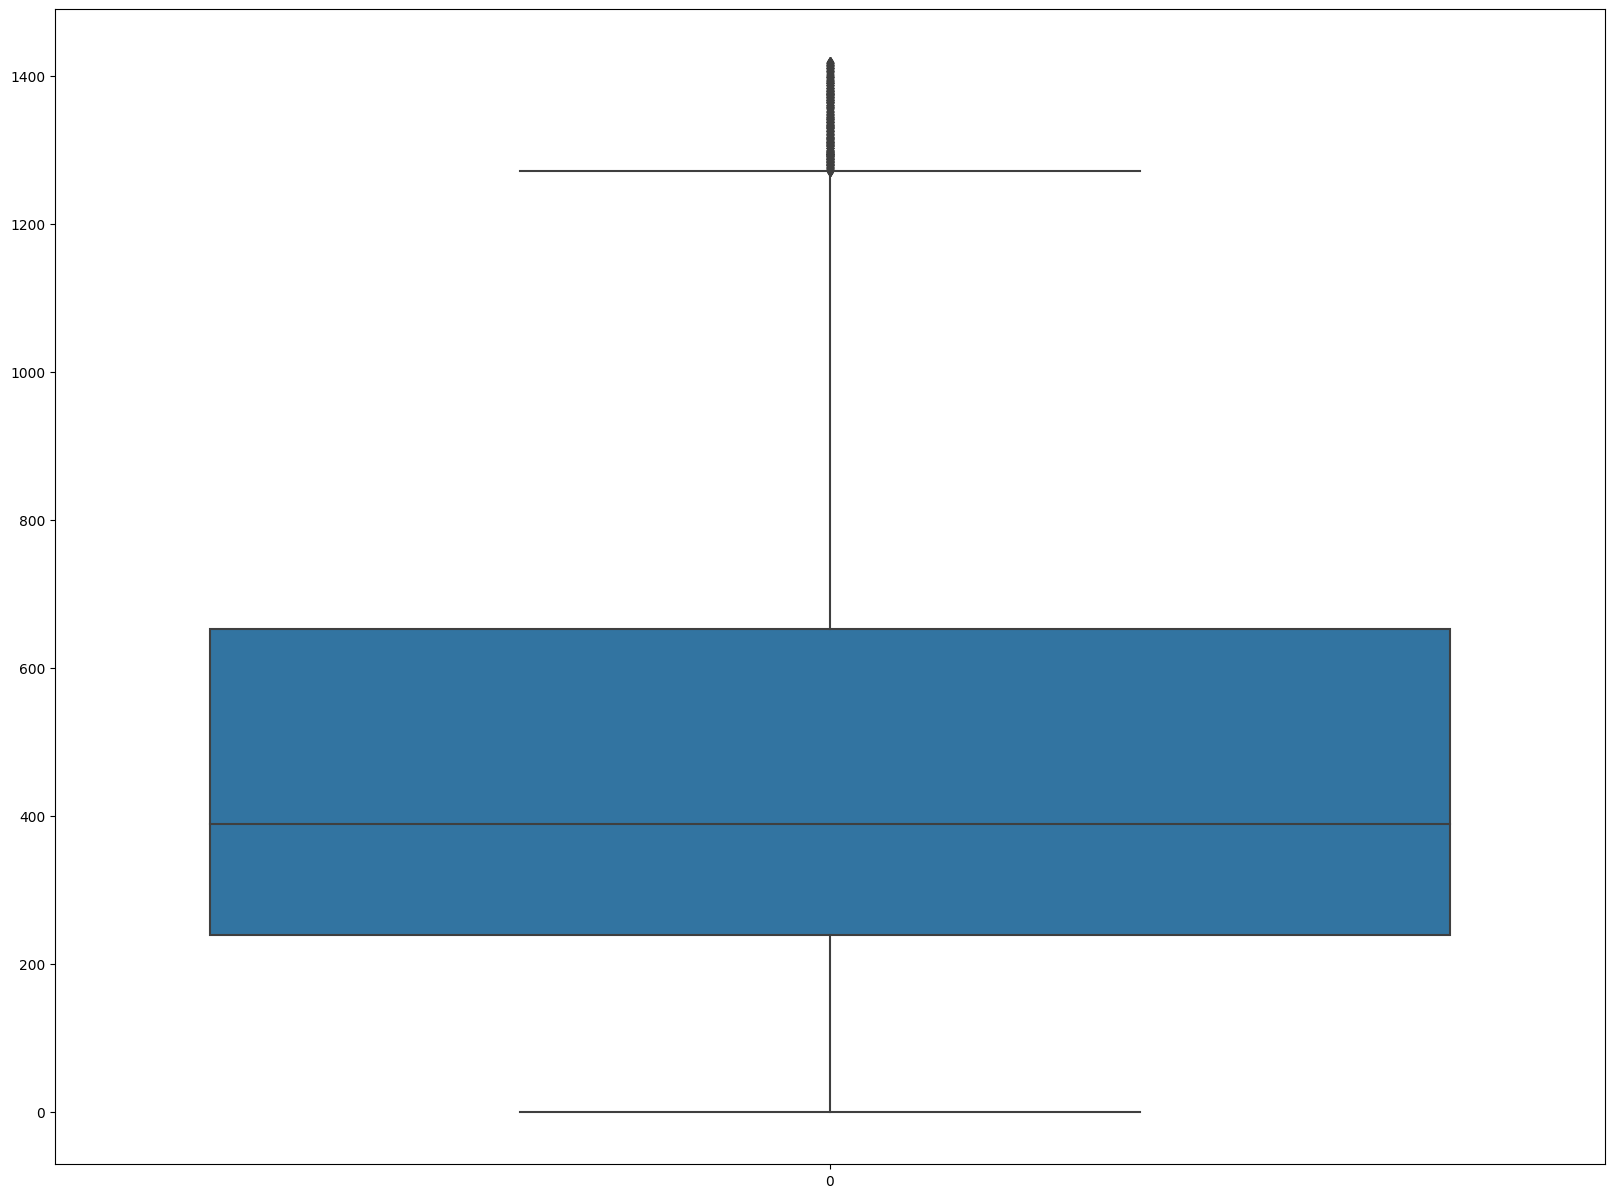

In [ ]:
plt.figure(figsize=(20,15))
sns.boxplot(online_df_without_outliers[' n_tokens_content'])
plt.show()

### clip all rows from the dataset that are beyond the lower limit (q1 - inter_quantile_range * 1.5) and set them to the lower limit and above the upper limit (q3 + inter_quantile_range * 1.5) and set them to the upper limit

In [ ]:
online_df_with_cliped_outliers[' n_tokens_content_cliped'] = online_df[' n_tokens_content'].clip(lower=lower_limit, upper=higher_limit)

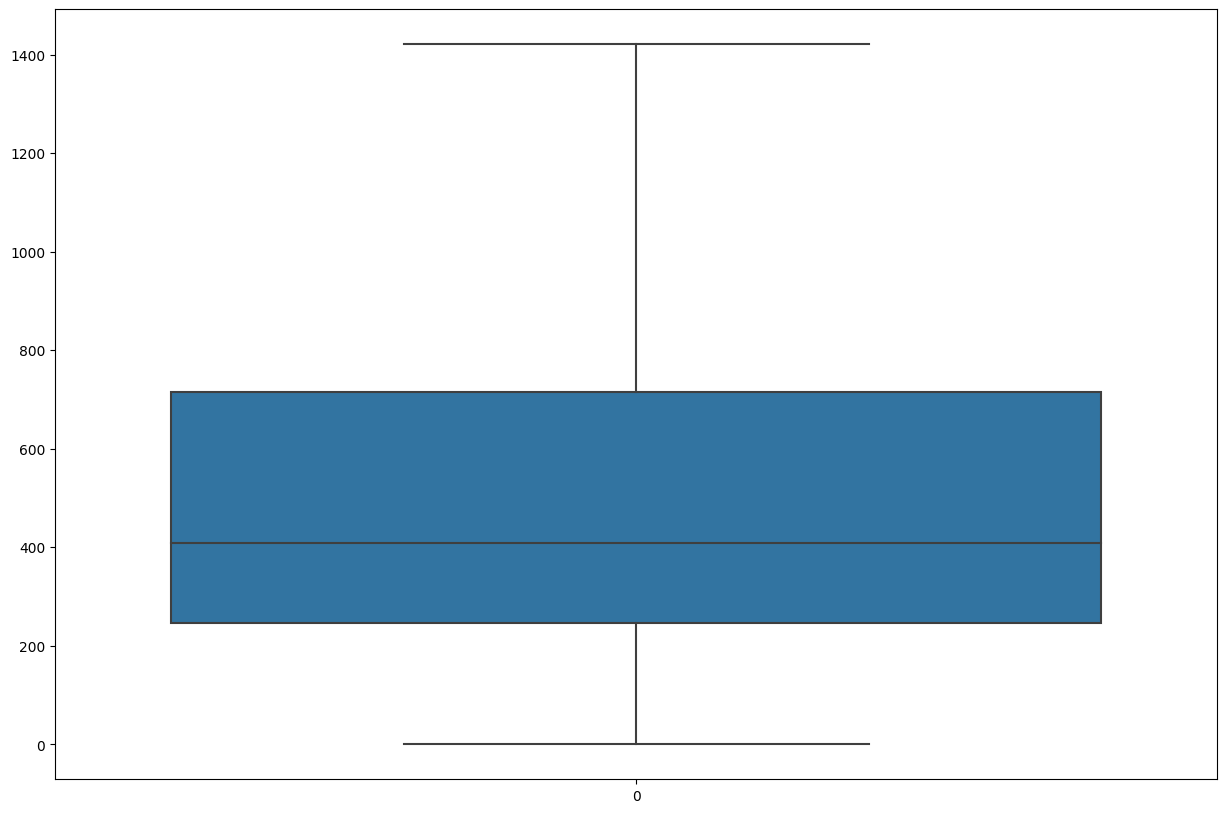

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(online_df_with_cliped_outliers[' n_tokens_content_cliped'])
plt.show()

### weight of evidence encoding (using a feature and the label to calculate a weight of evidence)

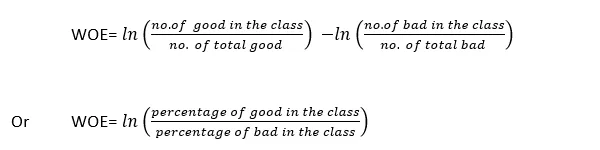

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', usecols=['Age', 'Survived'])
data.head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [ ]:
def create_label_encoded_bucketized_columns(df, x, bucketing_column, bucketing_boundaries=[21,41,61]):
    df[bucketing_column] = 0
    for i, item in enumerate(bucketing_boundaries):
      for j, row in enumerate(df.values):
        previous_item = 0
        value = df[x][j]
        if i > 0:
          previous_item = bucketing_boundaries[i - 1]
        if value > previous_item and value < item:
          # print(f'{value} > {previous_item} and {value} < {item} = {i}')
          df[bucketing_column][j] = i
    return df

In [ ]:
data = create_label_encoded_bucketized_columns(data, 'Age', 'Age_bucket', bucketing_boundaries=[10,20,30,40,50,60])
data.head()

<ipython-input-101-168d4c504f91>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bucketing_column][j] = i


,Survived,Age,Age_bucket
0,0,22.0,2
1,1,38.0,3
2,1,26.0,2
3,1,35.0,3
4,0,35.0,3


### calculate weight of evidence for every Age_bucket using Survived label

In [ ]:
import numpy
data['sum_survived_1'] = data[(data['Survived'] == True)].count()['Survived']
data['sum_survived_0'] = data[(data['Survived'] == False)].count()['Survived']

data_survived_1 = pd.DataFrame(data.groupby(['Age_bucket']).apply(lambda x: x[x['Survived'] == 1]['Survived'].count()))
data_combined = pd.merge(data, data_survived_1, on="Age_bucket")
data_survived_0 = pd.DataFrame(data.groupby(['Age_bucket']).apply(lambda x: x[x['Survived'] == 0]['Survived'].count()))
data_combined = pd.merge(data_combined, data_survived_0, on="Age_bucket", suffixes=("_survived_1", "_survived_0"))
data_combined['weight_of_evidence'] = numpy.log(data_combined['0_survived_1'] / data_combined.sum_survived_1) - numpy.log(data_combined['0_survived_0'] / data_combined.sum_survived_0)
data_combined.sample(20)

,Survived,Age,Age_bucket,sum_survived_1,sum_survived_0,0_survived_1,0_survived_0,weight_of_evidence
722,0,18.0,1,342,549,41,59,0.109322
761,0,18.0,1,342,549,41,59,0.109322
382,0,NaN,0,342,549,121,209,-0.073256
234,1,32.0,3,342,549,63,79,0.246975
800,1,13.0,1,342,549,41,59,0.109322
571,0,NaN,0,342,549,121,209,-0.073256
204,1,26.0,2,342,549,74,131,-0.097845
193,1,24.0,2,342,549,74,131,-0.097845
640,0,NaN,0,342,549,121,209,-0.073256
454,0,NaN,0,342,549,121,209,-0.073256
